Importing Libraries

In [28]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [16]:
data = pd.read_csv('GDPR.csv')
data = data.dropna(subset=['Date'])
data['Date'] = data['Date'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y'))
grouped = data.groupby([data['Date'].dt.year, 'Type'])['Type'].count()

for year in range(data['Date'].dt.year.min(), data['Date'].dt.year.max() + 1):
    year_data = grouped[year]
    if year_data.empty:
        print(f"No offences recorded in {year}.")
    else:
        print(f"In {year}:")
        for offence, count in year_data.items():
            print(f"{offence}: {count}")


ValueError: time data '2021' does not match format '%d/%m/%Y'

2. Most expensive violation by country, listing the specific violation type e.g failure to comply with processing regulation

In [38]:
# Load the data 
data = pd.read_csv('GDPR.csv', dayfirst=True)
data['Date'] = pd.to_datetime('')


# Group the data by country and type of violation, and sum the amounts
grouped = data.groupby(['Country', 'Type'], as_index=False)['Amount'].sum()

# Sort the data in descending order based on the amount column
sorted_data = grouped.sort_values(['Country', 'Amount'], ascending=[True, False])

# Loop over the sorted data and print the top violations for each country
for country, violations in sorted_data.groupby('Country'):
    print(f"\nThe most expensive violations in {country} are:")
    for index, row in violations.nlargest(3, 'Amount').iterrows():
        print(f"{row['Type']}: {row['Amount']} euros")


The most expensive violations in AUSTRIA are:
Unknown: 22700000 euros
Insufficient legal basis for data processing: 2016750 euros
Insufficient fulfilment of information obligations: 54800 euros

The most expensive violations in BELGIUM are:
Insufficient legal basis for data processing: 817500 euros
Insufficient fulfilment of data subjects rights: 696500 euros
Insufficient technical and organisational measures to ensure information security: 145000 euros

The most expensive violations in BULGARIA are:
Insufficient technical and organisational measures to ensure information security: 3116120 euros
Insufficient legal basis for data processing: 91927 euros
Insufficient fulfilment of data subjects rights: 2132 euros

The most expensive violations in CROATIA are:
Insufficient technical and organisational measures to ensure information security: 374250 euros
Insufficient fulfilment of data subjects rights: 124245 euros
Insufficient fulfilment of information obligations: 4000 euros

The most 

To visualize the result

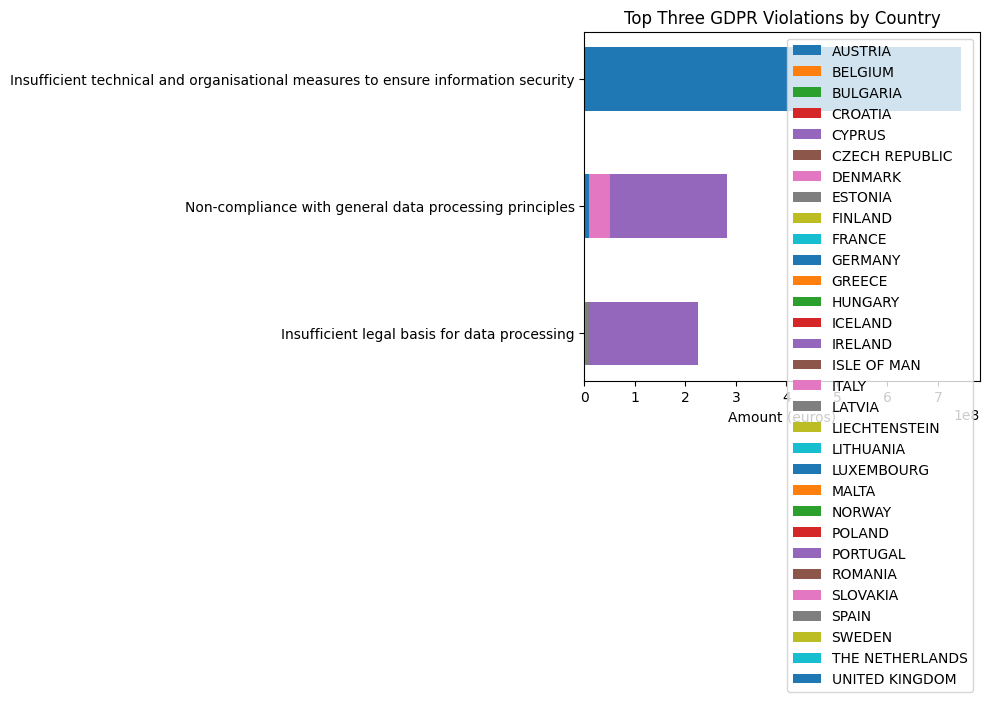

In [39]:
# Create a figure and axes objects
fig, ax = plt.subplots(figsize=(10, 6))

# To loop over the sorted data and plot a horizontal bar chart for each country
for i, (country, violations) in enumerate(sorted_data.groupby('Country')):
    
    # Get the top 3 violations for the current country
    top_violations = violations.nlargest(3, 'Amount')
    
    # Plot a horizontal bar chart for the top violations
    y_pos = range(len(top_violations))
    ax.barh(y_pos, top_violations['Amount'], height=0.5, align='center', 
            color=f'C{i}', label=country)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(top_violations['Type'])
    ax.invert_yaxis()  # Invert the y-axis to show the highest violation at the top
    ax.set_xlabel('Amount (euros)')
    ax.set_title('Top Three GDPR Violations by Country')
    ax.legend()
    
plt.tight_layout()
plt.show()


3.Vodafone's GDPR violations in volume

In [23]:
data = data.dropna(subset=['Controller_Processor'])
# if data['VIOLATED_ARTICLES'].isnull().values.any():
#     print("VIOLATED_ARTICLES has NaN values.")
# else:
#     print("VIOLATED_ARTICLES does not have NaN values.")
#data['Date'] = pd.to_datetime(data['Date'])


# group the data by company and count the number of violations
grouped = data.groupby(['Controller_Processor'])['VIOLATED_ARTICLES'].count()

for company, count in grouped.items():
    if pd.isna(company):
        print(f"No company name recorded for {count} violations.")
    else:
        print(f"{company} committed {count} violations.")


'Isabella Gonzaga' high school committed 1 violations.
A. ΕΠΙΛΟΓΗ ΙΔΙΩΤΙΚΗ ΚΕΦΑΛΑΙΟΥΧΙΚΗ ΕΤΑΙΡΕΙΑ committed 1 violations.
A.P. EOOD committed 1 violations.
A.S.L. Napoli 1 Centro committed 1 violations.
AC Omonia committed 1 violations.
ACCOR SA committed 1 violations.
ACKERMANN & SCHWARTZ ATTORNEYS AT LAW SLP committed 1 violations.
ACONCAGUA JUEGOS S.A. committed 1 violations.
ACTIVE ASSURANCES (car insurer) committed 1 violations.
AD735 DATA MEDIA ADVERTISING S.L. committed 1 violations.
ADSL HOUSE, S.L. committed 1 violations.
AEMA Hispánica committed 1 violations.
ALFA BANK S.A. committed 1 violations.
ALPA 57 PRODUCCIONES, S.L. committed 1 violations.
AMADOR RECREATIVOS, S.L committed 1 violations.
AMPLIFON Hungary Trade and Service Provider LLC committed 1 violations.
AMPUDIA DIAZ, S.L. committed 1 violations.
ANIVERSALIA NETWORKS, S.L. committed 1 violations.
APARTAMENTOS PLAYA DE COVACHOS, S.L. committed 1 violations.
APOEL FC committed 1 violations.
ASESORES DE SEGURIDAD PRIV

4. Companies with the highest violations


Total GDPR violations by Vodafone: 101


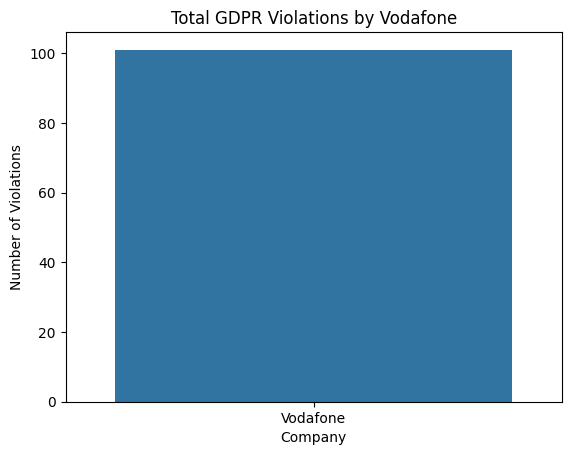

In [27]:
df = pd.read_csv('GDPR.csv')
# Filter the data for Vodafone
vodafone_df = df[df['Controller_Processor'].str.contains('Vodafone')]
# Calculate the total number of GDPR violations by Vodafone
total_vodafone_violations = vodafone_df['VIOLATED_ARTICLES'].sum()
# Print the total number of violations committed by Vodafone
print(f"Total GDPR violations by Vodafone: {total_vodafone_violations}")

#To Visualize the results
# Create a bar chart to visualize the total number of violations by Vodafone
sns.barplot(x=['Vodafone'], y=[total_vodafone_violations])
plt.title('Total GDPR Violations by Vodafone')
plt.xlabel('Company')
plt.ylabel('Number of Violations')
plt.show()

5.Map the data and make this interactive. 

In [31]:
# To ggregate the data by country and sum the amount
df_agg = df.groupby('Country', as_index=False).agg({'Amount': 'sum'})

# To create a map with a custom colorscale
fig = px.choropleth(df_agg, 
                    locations="Country", 
                    locationmode='country names',
                    color="Amount",
                    color_continuous_scale=px.colors.sequential.Bluered_r,
                    range_color=(0, df_agg['Amount'].max()),
                    title='Total amount fined by country')

fig.show()

6.Breakdown / Distribution and important metrics of fines levied per article.

In [33]:
df = df.dropna(subset=['VIOLATED_ARTICLES', 'Amount'])

fig = px.box(df, x='VIOLATED_ARTICLES', y='Amount', title='GDPR fines distribution per article')

fig.show()

7.Top 10 most violated articles

Top 10 Most Violated Articles:
Article number: 1, Number of violations: 871
Article number: 2, Number of violations: 449
Article number: 3, Number of violations: 117
Article number: 4, Number of violations: 49
Article number: 5, Number of violations: 26


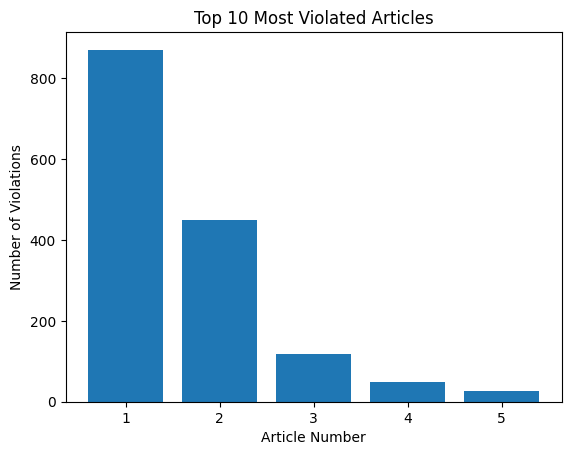

In [35]:
counts = data["VIOLATED_ARTICLES"].value_counts(sort = False).nlargest(10)
top_ten = counts.head()
print("Top 10 Most Violated Articles:")
for i, (article, count) in enumerate(zip(top_ten.index, top_ten.values), start=1):
    print(f"Article number: {article}, Number of violations: {count}")

# To visualize the data using a bar plot
plt.bar(top_ten.index, top_ten.values)
plt.title("Top 10 Most Violated Articles")
plt.xlabel("Article Number")
plt.ylabel("Number of Violations")
plt.show()

8.Article with the highest associated fine

The article with the highest associated file is:
Article number: 1, Number of violations: 26


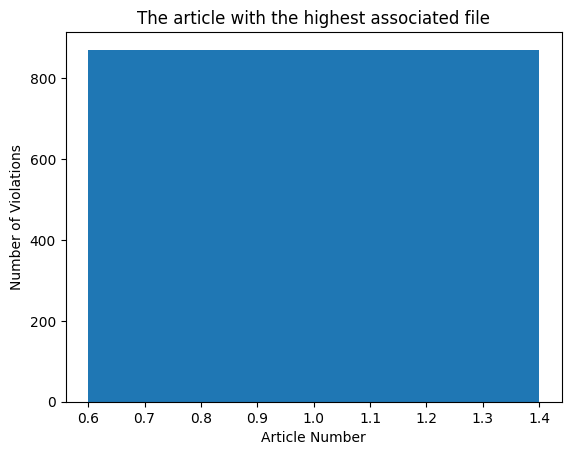

In [37]:
highest = data["VIOLATED_ARTICLES"].value_counts(sort = False).nlargest(1)
highest_fine = highest.head()
print("The article with the highest associated file is:")
for i, (article, highest) in enumerate(zip(highest_fine .index, highest_fine .values), start=1):
    print(f"Article number: {article}, Number of violations: {count}")

# To visualize the data using a bar plot
plt.bar(highest_fine .index, highest_fine .values)
plt.title("The article with the highest associated file")
plt.xlabel("Article Number")
plt.ylabel("Number of Violations")
plt.show()